In [2]:
import pandas as pd
import re
import string
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = nltk. corpus.stopwords.words('arabic')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [3]:
Lyrics_df = pd.read_csv('farasa_lyrics.csv')

In [4]:
Lyrics_df.head()

,Unnamed: 0,Unnamed: 0.1,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect,Clean_Lyrics,Lyrics_lemmatized
0,16,16,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,1,اروح لاحبابي والاقي الفرح ساكن عينهم,morocco,meghribi,"['اروح', 'لاحبابي', 'والاقي', 'الفرح', 'ساكن',...","['اروح', 'احباب', 'اقي', 'فرح', 'ساكن', 'عين']"
1,17,17,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,2,ابتسم لافراحهم وانا من الهم احترق,morocco,meghribi,"['ابتسم', 'لافراحهم', 'وانا', 'الهم', 'احترق']","['ابتسم', 'افراح', 'وان', 'هم', 'احترق']"
2,18,18,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,3,واسأل جروحي من ترى حس بعذابي منهم,morocco,meghribi,"['واسل', 'جروحي', 'ترى', 'حس', 'بعذابي', 'منهم']","['اسل', 'جرح', 'رأى', 'حس', 'عذاب', 'من']"
3,19,19,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,4,وبالحقيقه انصدم محدن معه همي فرق,morocco,meghribi,"['وبالحقيقه', 'انصدم', 'محدن', 'معه', 'همي', '...","['حقيقه', 'انصدم', 'محدن', 'مع', 'هم', 'فرق']"
4,20,20,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,5,دورت في كل الوجيه حسيت غربه بينهم,morocco,meghribi,"['دورت', 'الوجيه', 'حسيت', 'غربه', 'بينهم']","['دورة', 'وجيه', 'حسي', 'غرب', 'بين']"


In [1]:
# Count Vectorizer

In [5]:
X_train = Lyrics_df.Lyrics_lemmatized.apply(lambda x:" ".join(eval(x)))

In [6]:
Lyrics_df['Lyrics_lemmatized'] = X_train

In [7]:
Lyrics_df

,Unnamed: 0,Unnamed: 0.1,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect,Clean_Lyrics,Lyrics_lemmatized
0,16,16,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,1,اروح لاحبابي والاقي الفرح ساكن عينهم,morocco,meghribi,"['اروح', 'لاحبابي', 'والاقي', 'الفرح', 'ساكن',...",اروح احباب اقي فرح ساكن عين
1,17,17,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,2,ابتسم لافراحهم وانا من الهم احترق,morocco,meghribi,"['ابتسم', 'لافراحهم', 'وانا', 'الهم', 'احترق']",ابتسم افراح وان هم احترق
2,18,18,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,3,واسأل جروحي من ترى حس بعذابي منهم,morocco,meghribi,"['واسل', 'جروحي', 'ترى', 'حس', 'بعذابي', 'منهم']",اسل جرح رأى حس عذاب من
3,19,19,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,4,وبالحقيقه انصدم محدن معه همي فرق,morocco,meghribi,"['وبالحقيقه', 'انصدم', 'محدن', 'معه', 'همي', '...",حقيقه انصدم محدن مع هم فرق
4,20,20,1538,ابتسام,اروح لحبايبى,ملامح,بندر بن فهد,5,دورت في كل الوجيه حسيت غربه بينهم,morocco,meghribi,"['دورت', 'الوجيه', 'حسيت', 'غربه', 'بينهم']",دورة وجيه حسي غرب بين
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525281,527891,527891,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,37,مالي وياهم ذنب,iraq,iraqi,"['مالي', 'وياهم', 'ذنب']",مالي يا ذنب
525282,527892,527892,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,38,حرقت الروح لمن فارقتهم,iraq,iraqi,"['حرقت', 'الروح', 'لمن', 'فارقتهم']",حرق روح من فارق
525283,527893,527893,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,39,بجيت ومن دموعي غرقتهم,iraq,iraqi,"['بجيت', 'دموعي', 'غرقتهم']",جيت دمعة غرق
525284,527894,527894,1093,يونس الخطيب,احن الهم دويتو ادريس ويونس الخطيب,عبد الله العبد الله,يونس الخطيب,40,ايش قال القلب لمن ودعتهم,iraq,iraqi,"['ايش', 'قال', 'القلب', 'لمن', 'ودعتهم']",ايش قال قلب من ودع


In [9]:
count_vect = CountVectorizer()

In [10]:
gulf_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='gulf']['Lyrics_lemmatized'])
gulfvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
gulfvocab

,word,count
8513,ييوفيكي,37879
28305,ييني,37878
24296,ييش,37877
18154,ييسهر,37876
29411,ييسراك,37875
...,...,...
10983,أبدل,4
4503,أبدع,3
20020,أبحر,2
3968,أبان,1


In [11]:
gulf_vocab

<144994x37880 sparse matrix of type '<class 'numpy.int64'>'
	with 629889 stored elements in Compressed Sparse Row format>

There are 37 words in the combination of all review.


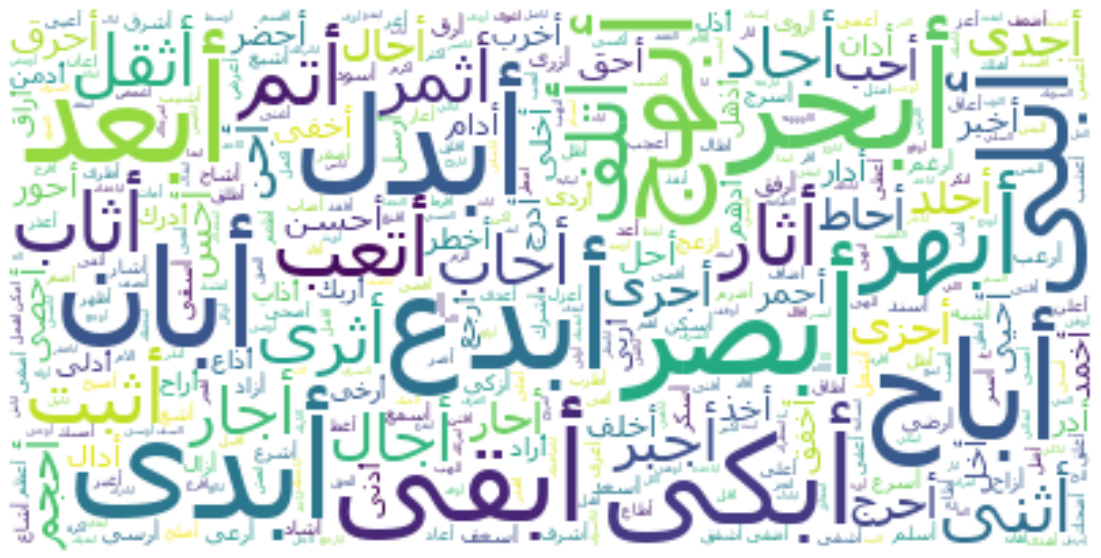

In [19]:
texts = ' '.join(word for word in gulfvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('farasagulf.png')

In [15]:
count_vect = CountVectorizer()

In [16]:
iraqi_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='iraqi']['Lyrics_lemmatized'])
iraqivocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
iraqivocab

,word,count
10017,يييييي,27154
24700,ييييي,27153
23257,ييييوم,27152
6200,يييوم,27151
23244,ييينك,27150
...,...,...
17639,أبصر,4
1542,أبدى,3
12116,أبدع,2
16798,أبحر,1


There are 36 words in the combination of all review.


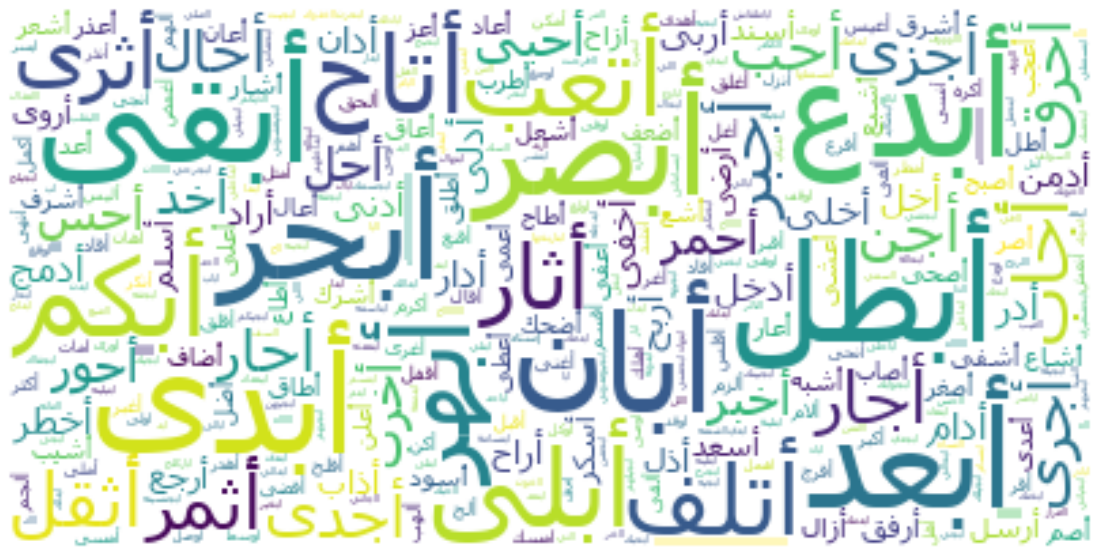

In [19]:
texts = ' '.join(word for word in iraqivocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('farasairaqi.png')

In [20]:
count_vect = CountVectorizer()

In [21]:
meghribi_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='meghribi']['Lyrics_lemmatized'])
meghribivocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
meghribivocab

,word,count
9388,يييك,11957
6099,ييش,11956
4746,ييجي,11955
4752,ييجى,11954
11264,ييج,11953
...,...,...
8673,أبلى,4
3272,أبقى,3
5612,أبعد,2
3413,أبدى,1


There are 36 words in the combination of all review.


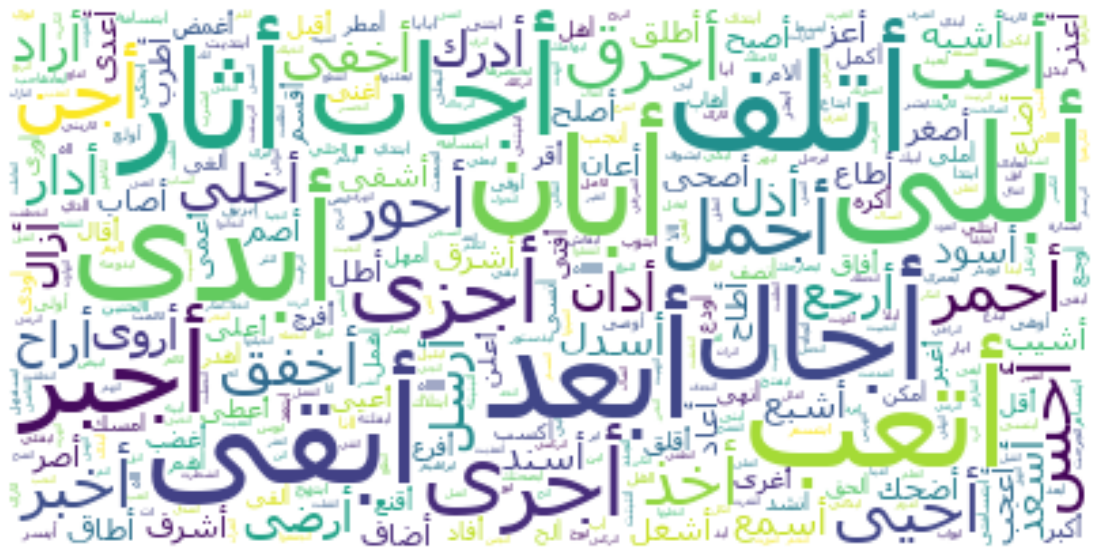

In [22]:
texts = ' '.join(word for word in meghribivocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('farasameghribi.png')

In [23]:
count_vect = CountVectorizer()

In [24]:
sudan_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='sudan']['Lyrics_lemmatized'])
sudanvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
sudanvocab

,word,count
16728,ييييي,24800
19654,ييييه,24799
10953,يييين,24798
19112,يييه,24797
8018,ييوم,24796
...,...,...
281,أبقى,4
15043,أبعد,3
2926,أبدى,2
15491,أبدع,1


There are 37 words in the combination of all review.


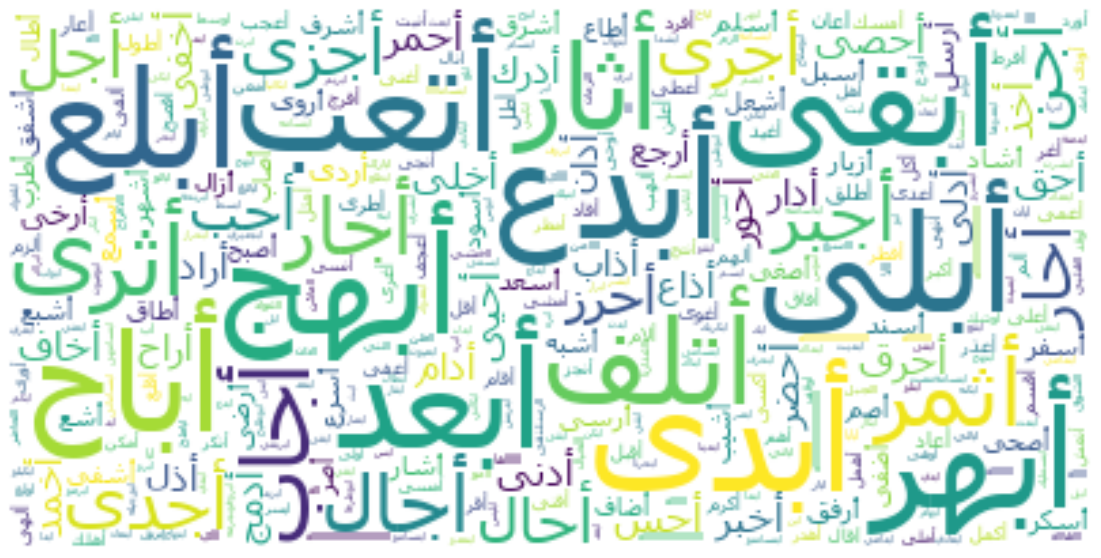

In [25]:
texts = ' '.join(word for word in sudanvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('farasasudan.png')

In [26]:
count_vect = CountVectorizer()

In [27]:
egyptian_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='egyptian']['Lyrics_lemmatized'])
egyptianvocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
egyptianvocab

,word,count
20604,ييييييييييييييييه,40691
31592,يييه,40690
26473,يييك,40689
13700,ييو,40688
32022,ييه,40687
...,...,...
12784,أبصر,4
3461,أبدى,3
14936,أبحر,2
1359,أبان,1


There are 37 words in the combination of all review.


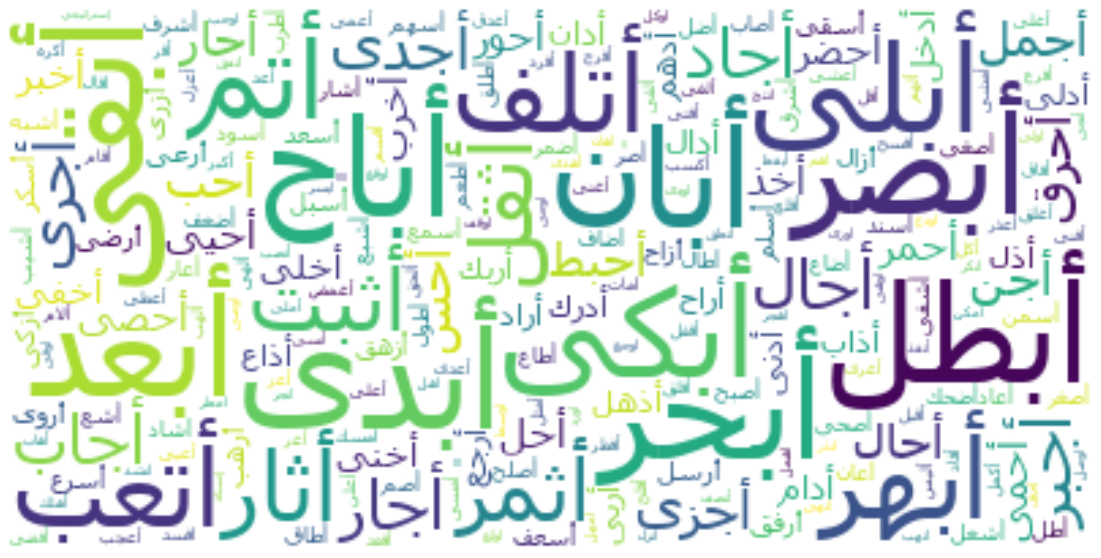

In [28]:
texts = ' '.join(word for word in egyptianvocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('farasaegyptian.png')

In [29]:
count_vect = CountVectorizer()

In [30]:
levantine_vocab = count_vect.fit_transform(Lyrics_df[Lyrics_df['SongDialect']=='levantine']['Lyrics_lemmatized'])
levantinevocab = pd.DataFrame(count_vect.vocabulary_.items(), columns=['word','count']).sort_values(by='count', ascending = False)
levantinevocab

,word,count
17130,يييييييييييييييييييييييييييييي,31732
28548,ييييييه,31731
17121,ييرجع,31730
23040,ييديه,31729
5546,ييجي,31728
...,...,...
8559,أبرم,4
4914,أبدى,3
29360,أبدع,2
17021,أبحر,1


In [1]:
texts = ' '.join(word for word in levantinevocab['word'])
texts = ''.join(texts)
print ("There are {} words in the combination of all review.".format(len(set(texts))))
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
# Generate a word cloud image
wc = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords ,background_color="white",
               font_path="Tahoma Regular font.ttf")
wc.generate(bidi_text)
#Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('farasalevantin.png')

NameError: name 'levantinevocab' is not defined

In [2]:
# Count Vectorizer and ML Models

In [8]:
count_vect = CountVectorizer()

In [9]:
all_vocab = count_vect.fit_transform(Lyrics_df['Lyrics_lemmatized'])

In [10]:
X_feature = all_vocab
y= Lyrics_df['SongDialect']

In [12]:
X_feature.shape

(525286, 102368)

In [13]:
y.shape

(525286,)

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_feature, y, test_size = 0.2, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [17]:
# Model performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CV accuracy: 0.591 +/- 0.002


In [15]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.4

In [16]:
round(decision_tree.score(X_test, y_test)* 100, 2)

59.3

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_vect = TfidfVectorizer()

In [37]:
allvocab = tfidf_vect.fit_transform(Lyrics_df['Lyrics_lemmatized'])

In [38]:
allvocab

<525286x102368 sparse matrix of type '<class 'numpy.float64'>'
	with 2344972 stored elements in Compressed Sparse Row format>

In [39]:
X = allvocab
y = Lyrics_df['SongDialect']

In [40]:
X_train , X_test, y_train, y_test = train_test_split(X_feature, y, test_size = 0.2)

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Model performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arwaalgethami/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CV accuracy: 0.592 +/- 0.001
